In [6]:
import numpy as np
import matplotlib.pyplot as plt

# N-Particle Spring Problem

$$ H = T + V $$

$$ H = \sum_n {1 \over{2}}mx_n'^2 + \sum_n {k\over2}[(x_n - x_{n-1})^2 - (x_n - x_{n+1})^2] $$

$$ x_n'' = {k\over m}(x_{n+1} + x_{n-1} -2x_n)  $$

$$ v_n(t+1) = v_n(t) + x_n''(t)dt $$

$$ x_n(t+1) = x_n(t) + v_n(t+1)dt $$

In [224]:
# Spring constants
k=1
m=2

# Function parameters
N=6           # Number of particles
l=12
t0=0           # Initial time
T=50           # Final time
steps=1000            # Iterations to do Euler-Cromer
dt=(T-t0)/steps    # dt
time = np.linspace(t0,T,steps)

# Initial conditions
x0 = 1
v0 = 0

In [232]:
x = []
v = []
for i in range(N):
    x.append(np.array([0]))
    v.append(np.array([0]))
    
x[1][0] = x0
v[1][0] = v0

for i in range(N):
    E.append(np.array([]))
for t in time:
    for n in range(1,N-1):
        # For Motion
        dvdt = k/m*(x[n+1][-1] + x[n-1][-1] - 2*x[n][-1])
        vnew = v[n][-1] + dvdt*dt
        xnew = x[n][-1] + vnew*dt
        
        # For energy
        V = k/2*((x[n][-1]-x[n-1][-1])**2 + (x[n][-1]-x[n+1][-1])**2)
        T = 1/2*m*v[n][-1]
        
        
        ## Appending
        x[n] = np.append(x[n], xnew)
        v[n] = np.append(v[n], vnew)

def EFUP(X,V):
    ''' Calculating the total energy
    using same format (lists of lists for particles) '''
    zero=np.array([0])
    Klist = []
    Vlist = []
    for i in range(N):
        Klist.append(zero)
        Vlist.append(zero)
    Klist[0] = np.zeros(int(T/dt+1))
    Klist[N-1] = np.zeros(int(T/dt+1))
    Vlist[0] = np.zeros(int(T/dt+1))
    Vlist[N-1] = np.zeros(int(T/dt+1))
    for i in range(1,N-1):
        Klist[i] = np.append(Klist[i],1/2*m*(V[i]**2))
        Vlist[i] = np.append(Vlist[i],1/2*m*((X[i+1]-X[i])**2) + (X[i]-X[i-1])**2)
    return Vlist + Klist

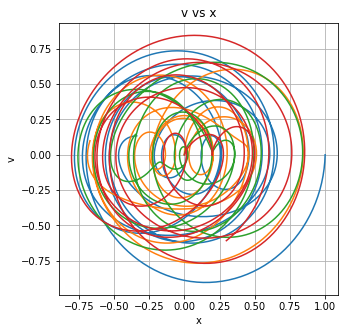

In [245]:
plt.figure(figsize=(5,5))
for n in range(1,N-1):
    plt.plot(x[n],v[n])
plt.title('v vs x')
plt.xlabel('x')
plt.ylabel('v')
plt.grid()

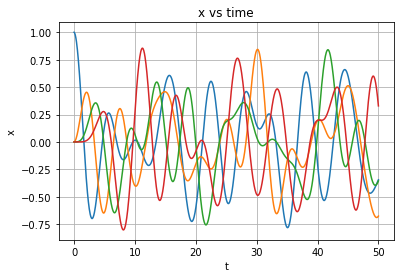

In [244]:
for n in range(1,N-1):
    plt.plot(time,x[n][:-1])
plt.title('x vs time')
plt.xlabel('t')
plt.ylabel('x')
plt.grid()

In [236]:
E = []
for n in range(1,N-1):
    T = 1/2*m*np.array(v[n])**2
    V = k/2*m*((np.array(x[n])-np.array(x[n-1]))**2 + (np.array(x[n])-np.array(x[n+1]))**2)
    E.append(T+V)
Etot = sum(E)

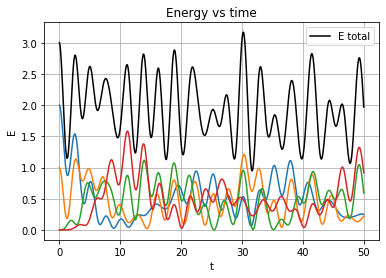

In [246]:
plt.plot(time, Etot[:-1], 'k', label='E total')
for n in range(0,N-2):
    plt.plot(time, E[n][:-1])
plt.title('Energy vs time')
plt.xlabel('t')
plt.ylabel('E')
plt.legend()
plt.grid()